In [1]:
##Step-1 Data Collection
import math
import pandas as pd
import sklearn.metrics
import seaborn as sns

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1  


<Axes: >

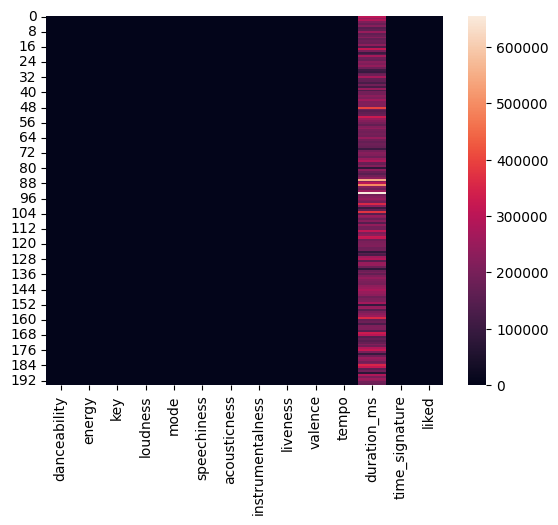

In [2]:
df = pd.read_csv("C:\\Users\\91885\\Downloads\\archive (1)\\spotify_recommendation.csv")
print(df.head())
sns.heatmap(df)

In [3]:
print(df.isnull().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64


In [4]:
X=df.drop('liked',axis=1)
Y=df['liked']
# print(Y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [6]:
X_scalar_train=scaler.fit_transform(X_train)
print(X_scalar_train)

[[ 0.56052807  1.02183373  1.64633696 ...  1.06291932 -0.51164158
   0.22274226]
 [-2.08195163  1.28389064  0.75072965 ... -0.93907676  0.51720907
  -1.79678753]
 [ 1.02110112  0.19008788  1.64633696 ...  1.20269517 -0.29824343
   0.22274226]
 ...
 [-0.7886253   1.28389064 -1.33902073 ... -0.44554029 -0.41347869
  -1.79678753]
 [-2.29595527  1.34845539  0.75072965 ... -0.91556503  0.34436931
  -5.8358471 ]
 [ 0.56052807 -0.63786004 -1.63755649 ... -1.32310174 -0.50972275
   0.22274226]]


In [7]:
X_scalar_test=scaler.transform(X_test)
print(X_scalar_test)

[[ 8.25706490e-01  6.47563180e-02 -1.63755649e+00  3.79106114e-01
  -1.01481562e+00  1.41684025e+00  2.34443345e-02 -5.53557461e-01
  -3.86191972e-01  5.37120389e-01  6.77704765e-01 -2.48971411e-01
   2.22742256e-01]
 [ 5.55875817e-01  3.19217376e-01  1.53658116e-01  7.11299206e-01
   9.85400676e-01  1.39926343e+00 -1.00745627e-01 -5.53557461e-01
   1.70250979e+00  9.88509036e-01  6.79804027e-01 -2.67620914e-01
   2.22742256e-01]
 [-1.98425432e+00 -1.92535703e+00  4.52193885e-01 -1.20002921e+00
   9.85400676e-01 -7.49502711e-01  1.98875047e+00  2.20578634e+00
  -4.69003936e-01 -7.31947695e-01  5.68893024e-01 -6.32331075e-01
   2.22742256e-01]
 [-4.67619841e-01  6.34445254e-01  7.50729653e-01  8.44721021e-01
  -1.01481562e+00  1.70685777e+00 -7.60315574e-03 -5.53557461e-01
   1.98775101e+00 -2.95358675e-01 -8.08257759e-01 -3.53587371e-01
   2.24227204e+00]
 [ 7.41965936e-01 -5.16326397e-01 -1.33902073e+00  2.63016405e-03
  -1.01481562e+00  2.41871895e+00  8.55517073e-01 -5.53557461e-01


In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100000)
model.fit(X_scalar_train,Y_train)

LogisticRegression(max_iter=100000)

In [9]:
ycap=model.predict(X_scalar_test)
print(ycap)

[1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1]


In [20]:
from sklearn.metrics import accuracy_score
import numpy as np
accscore = accuracy_score(np.round(ycap),Y_test)
print(accscore*100)

93.22033898305084


[           inf 9.97668347e-01 7.43056290e-01 6.26094184e-01
 4.68558041e-01 4.52054134e-01 3.60687076e-01 3.26829548e-01
 3.08996748e-01 1.33952226e-06]


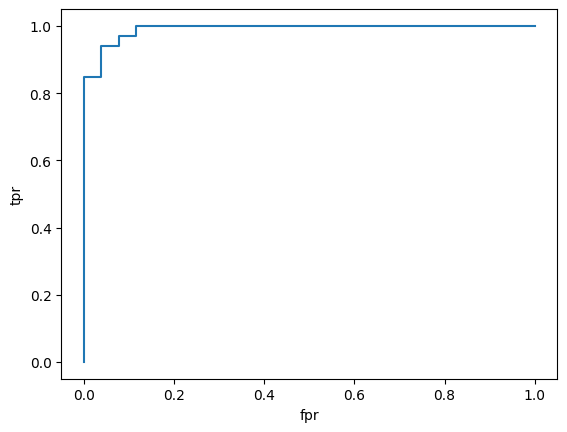

In [19]:
##performance evaluation using ROC curve
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,threshold=roc_curve(Y_test,model.predict_proba(X_scalar_test)[:,1])
print(threshold)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [12]:
mse=sklearn.metrics.mean_squared_error(Y_test,ycap)
print(mse)
# print(list(Y_test),ycap)

0.06779661016949153
